In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import utils.DataEngine as de

In [4]:
data = de.DataEngine('data2024')
rd4_df = data.data['round_4']['price_df']

In [5]:
rd4_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,3000000,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,3000000,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,3000100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,3000100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,3000200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,5999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
59996,3,5999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
59997,3,5999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
59998,3,5999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [2]:
day = 3
round_n = 4

days = [str(i) for i in range(-2, day+1)]

prices = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/prices_round_{round_n}_day_{day}.csv', delimiter=';')
    for day in days
}

prices = pd.concat(prices.values())

trades = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/trades_round_{round_n}_day_{day}_nn.csv', delimiter=';')
    for day in days
}

trades = pd.concat(trades.values())

FileNotFoundError: [Errno 2] No such file or directory: 'round-1-island-data-bottle/prices_round_1_day_-2.csv'

In [15]:
AMETHYSTS = prices[prices['product'] == 'AMETHYSTS'].reset_index(drop=True)

STARFRUIT = prices[prices['product'] == 'STARFRUIT'].reset_index(drop=True)

In [16]:
AMETHYSTS_trades = trades[trades['symbol'] == 'AMETHYSTS'].reset_index(drop=True)

STARFRUIT_trades = trades[trades['symbol'] == 'STARFRUIT'].reset_index(drop=True)

# AMETHYSTS

AMETHYSTS price is oscillating between 9995 and 10005.

We trade with the best bid or ask or t 9997 and 10003 to make a minimal profit.

In [17]:
AMETHYSTS

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
2,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
3,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
4,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
29996,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
29997,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
29998,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [18]:
AMETHYSTS_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
1,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
2,1500,NaN,NaN,AMETHYSTS,SEASHELLS,10004.0,1
3,2500,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
4,3200,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
...,...,...,...,...,...,...,...
7230,997600,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,4
7231,997700,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
7232,998400,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,4
7233,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1


In [19]:
AMETHYSTS_trades.price.describe()

count     7235.000000
mean      9999.968487
std          3.151743
min       9995.000000
25%       9998.000000
50%       9998.000000
75%      10002.000000
max      10005.000000
Name: price, dtype: float64

# STARFRUIT

STARFRUIT price dynamics is more complex.

In [20]:
STARFRUIT

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
1,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
2,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
4,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
29996,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
29997,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
29998,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


In [21]:
STARFRUIT_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1
1,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6
2,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2
3,1000,NaN,NaN,STARFRUIT,SEASHELLS,4997.0,2
4,1100,NaN,NaN,STARFRUIT,SEASHELLS,4997.0,1
...,...,...,...,...,...,...,...
8910,998500,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,3
8911,998700,NaN,NaN,STARFRUIT,SEASHELLS,5055.0,1
8912,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1
8913,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2


In [22]:
STARFRUIT_trades.price.describe()

count    8915.000000
mean     5036.637128
std        32.042691
min      4949.000000
25%      5026.000000
50%      5047.000000
75%      5058.000000
max      5094.000000
Name: price, dtype: float64

In [23]:
(STARFRUIT.ask_price_1 - STARFRUIT.bid_price_1).describe()

count    30000.000000
mean         5.399600
std          1.937243
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          8.000000
dtype: float64

In [24]:
# calculate freq of spreads above 1 2 3 4 5 6 7 8

STARFRUIT['spread'] = STARFRUIT.ask_price_1 - STARFRUIT.bid_price_1

STARFRUIT['spread_1'] = STARFRUIT['spread'] == 1
STARFRUIT['spread_2'] = STARFRUIT['spread'] == 2
STARFRUIT['spread_3'] = STARFRUIT['spread'] == 3
STARFRUIT['spread_4'] = STARFRUIT['spread'] == 4
STARFRUIT['spread_5'] = STARFRUIT['spread'] == 5
STARFRUIT['spread_6'] = STARFRUIT['spread'] == 6
STARFRUIT['spread_7'] = STARFRUIT['spread'] == 7
STARFRUIT['spread_8'] = STARFRUIT['spread'] == 8

STARFRUIT[['spread_1', 'spread_2', 'spread_3', 'spread_4', 'spread_5', 'spread_6', 'spread_7', 'spread_8']].sum().cumsum()

spread_1     2751
spread_2     4496
spread_3     5218
spread_4     6273
spread_5    10535
spread_6    18970
spread_7    29769
spread_8    30000
dtype: int64

***

# ORCHIDS

In [25]:
day = 0
round_n = 2

days = [str(i) for i in range(-1, day+2)]

prices = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/prices_round_{round_n}_day_{day}.csv', delimiter=';')
    for day in days
}

prices = pd.concat(prices.values()).reset_index(drop=True)

In [26]:
prices

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


In [27]:
explanatory_var = prices[['ORCHIDS', 'SUNLIGHT', 'HUMIDITY']]

In [28]:
import seaborn as sns

explanatory_var.corr()

,ORCHIDS,SUNLIGHT,HUMIDITY
ORCHIDS,1.000000,0.715692,0.710066
SUNLIGHT,0.715692,1.000000,0.622936
HUMIDITY,0.710066,0.622936,1.000000


In [29]:
explanatory_var[['SUNLIGHT', 'HUMIDITY']].shift()[1:]

,SUNLIGHT,HUMIDITY
1,2500.0000,79.00000
2,2499.4197,79.00410
3,2498.8457,79.00821
4,2498.2780,79.01234
5,2497.7166,79.01649
...,...,...
29998,2299.9330,69.91952
29999,2299.9436,69.93549
30000,2299.9556,69.95153
30001,2299.9690,69.96762


In [30]:
prices['ORCHIDS'][1:]

1        1201.75
2        1201.75
3        1201.75
4        1201.75
5        1200.25
          ...   
29998    1036.25
29999    1036.25
30000    1036.25
30001    1034.25
30002    1035.25
Name: ORCHIDS, Length: 30002, dtype: float64

In [31]:
#run regression

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(explanatory_var[['SUNLIGHT', 'HUMIDITY']].shift()[1:], prices['ORCHIDS'][1:], test_size=0.2, random_state=42, shuffle=False)

# x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ORCHIDS   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.584e+06
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:41:00   Log-Likelihood:                     -1.4391e+05
No. Observations:               24001   AIC:                                  2.878e+05
Df Residuals:                   23999   BIC:                                  2.878e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SUNLIGHT       0.0113      0.001     13.821      0.000       0.010       0.013
HUMIDITY      13.3786      0.030    449.782      0.000      13.320      13.437
==============================================================================
Omnibus:                     1625.851   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1708.141
Skew:                          -0.614   Prob(JB):                         0.00
Kurtosis:                       2.554   Cond. No.                         140.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

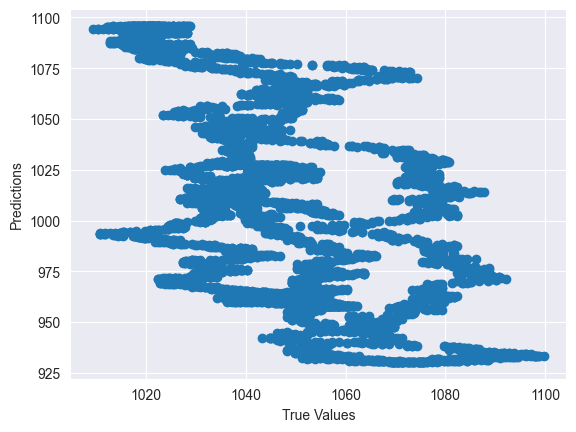

In [33]:
# test model

y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [34]:
y_train_pred = model.predict(x_train)

<Axes: >

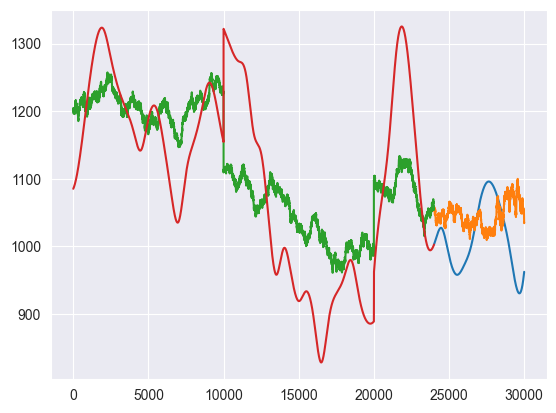

In [35]:
y_pred.plot()
y_test.plot()
y_train.plot()
y_train_pred.plot()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = './var.csv'
data = pd.read_csv(file_path)

# Function to adjust humidity based on specific rules
def humidity_adjustment(humidity):
    if humidity < 60:
        return -0.02 * ((60 - humidity) // 5)
    elif humidity > 80:
        return -0.02 * ((humidity - 80) // 5)
    else:
        return 0

# New conversion of SUNLIGHT to hours based on the given average of 2500 units per hour
data['SUNLIGHT_HOURS'] = (data['SUNLIGHT'] / 2500)

# Reapply the price adjustment logic for sunlight and humidity
data['SUNLIGHT_ADJUSTMENT'] = data['SUNLIGHT_HOURS'].apply(lambda x: -0.04 * 6 * (7 - x) if x < 7 else 0)
data['HUMIDITY_ADJUSTMENT'] = data['HUMIDITY'].apply(humidity_adjustment)
data['ADJUSTED_ORCHIDS_PRICE'] = data['ORCHIDS'] * (1 + data['SUNLIGHT_ADJUSTMENT'] + data['HUMIDITY_ADJUSTMENT'])

# Redefining the feature matrix and target vector with the new sunlight hours conversion
X = data[['SUNLIGHT_HOURS', 'HUMIDITY']]
y = data['ADJUSTED_ORCHIDS_PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the linear regression model with new data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices for ORCHIDS')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './var.csv'

In [37]:
model.intercept_

AttributeError: 'OLSResults' object has no attribute 'intercept_'

In [38]:
model.coef_

AttributeError: 'OLSResults' object has no attribute 'coef_'

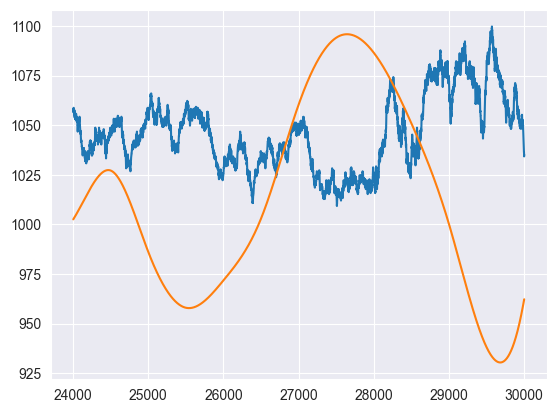

In [39]:
y_test.plot()
plt.plot(y_pred)

***

# CHOCOLATE

In [17]:
day = 0
round_n = 3

days = [str(i) for i in range(0, day+3)]

prices = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/prices_round_{round_n}_day_{day}.csv', delimiter=';')
    for day in days
}

prices = pd.concat(prices.values())

trades = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/trades_round_{round_n}_day_{day}_nn.csv', delimiter=';')
    for day in days
}

trades = pd.concat(trades.values())

FileNotFoundError: [Errno 2] No such file or directory: 'round-3-island-data-bottle/prices_round_3_day_0.csv'

In [18]:
prices

NameError: name 'prices' is not defined

In [19]:
prices.groupby('product').describe().T

NameError: name 'prices' is not defined

In [42]:
CHOCOLATE = prices[prices['product'] == 'CHOCOLATE'].reset_index(drop=True)

STRAWBERRIES = prices[prices['product'] == 'STRAWBERRIES'].reset_index(drop=True)

ROSES = prices[prices['product'] == 'ROSES'].reset_index(drop=True)

GIFT_BASKET = prices[prices['product'] == 'GIFT_BASKET'].reset_index(drop=True)

In [43]:
CHOCOLATE_trades = trades[trades['symbol'] == 'CHOCOLATE'].reset_index(drop=True)

STRAWBERRIES_trades = trades[trades['symbol'] == 'STRAWBERRIES'].reset_index(drop=True)

ROSES_trades = trades[trades['symbol'] == 'ROSES'].reset_index(drop=True)

GIFT_BASKET_trades = trades[trades['symbol'] == 'GIFT_BASKET'].reset_index(drop=True)

In [44]:
# run correlation analysis

mid_prices = pd.DataFrame({
    'CHOCOLATE': CHOCOLATE['mid_price'],
    'STRAWBERRIES': STRAWBERRIES['mid_price'],
    'ROSES': ROSES['mid_price'],
    'GIFT_BASKET': GIFT_BASKET['mid_price']
})

mid_prices.corr()

,CHOCOLATE,STRAWBERRIES,ROSES,GIFT_BASKET
CHOCOLATE,1.000000,0.273545,0.826358,0.947339
STRAWBERRIES,0.273545,1.000000,0.148667,0.498003
ROSES,0.826358,0.148667,1.000000,0.850830
GIFT_BASKET,0.947339,0.498003,0.850830,1.000000


<Axes: >

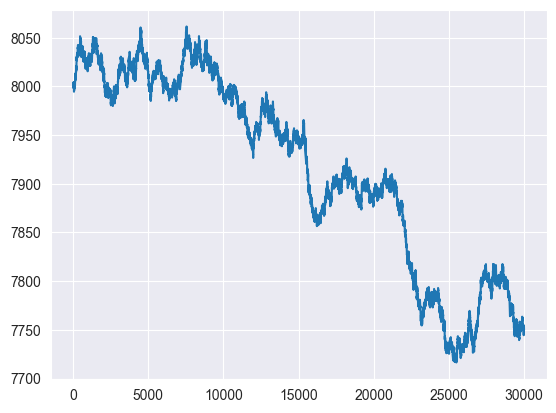

In [48]:
mid_prices.CHOCOLATE.plot()

<Axes: >

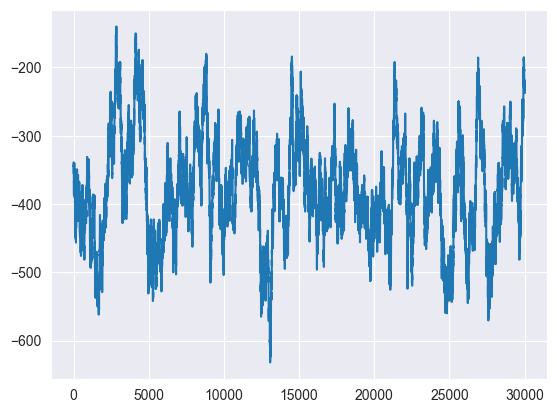

In [56]:
test = 6 * STRAWBERRIES['mid_price'] + 4 * CHOCOLATE['mid_price'] + 1 * ROSES['mid_price'] - GIFT_BASKET['mid_price']

test.plot()

<Axes: >

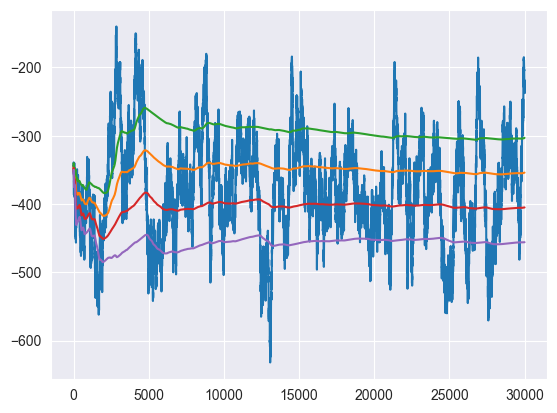

In [65]:
mean = test.expanding().mean()
std = test.expanding().std()

test.plot()
(mean + 1/3 * std).plot()
(mean + std).plot()
(mean - 1/3 * std).plot()
(mean - std).plot()

count    30000.000000
mean        -0.490483
std         76.424382
min       -253.000000
25%        -51.000000
50%         -2.000000
75%         50.000000
max        239.000000
Name: mid_price, dtype: float64

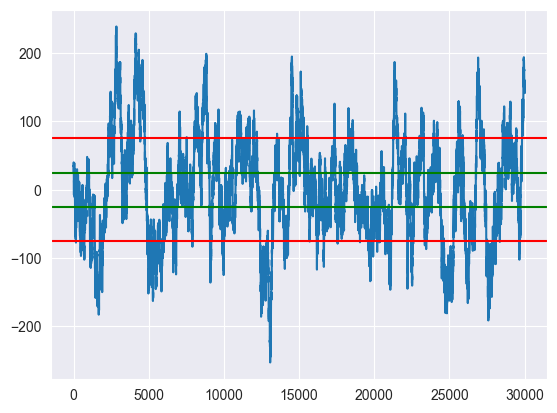

In [70]:
# GIFT_BASKET = 6 STRAWBERRIES + 4 CHOCOLATE + 1 ROSE

((6 * STRAWBERRIES['mid_price'] + 4 * CHOCOLATE['mid_price'] + 1 * ROSES['mid_price'] - GIFT_BASKET['mid_price']+379)).plot()
#plot line x = 75
plt.axhline(y=75, color='r', linestyle='-')
plt.axhline(y=25, color='g', linestyle='-')
plt.axhline(y=-25, color='g', linestyle='-')
plt.axhline(y=-75, color='r', linestyle='-')

display(((6 * STRAWBERRIES['mid_price'] + 4 * CHOCOLATE['mid_price'] + 1 * ROSES['mid_price'] - GIFT_BASKET['mid_price']+379)).describe())

In [55]:
# Run regression analysis

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mid_prices[['CHOCOLATE', 'STRAWBERRIES', 'ROSES']].shift()[1:], GIFT_BASKET['mid_price'][1:], test_size=0.2, random_state=42, shuffle=False)

# x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.394e+09
Date:                Wed, 17 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:31:21   Log-Likelihood:                     -1.3728e+05
No. Observations:               23999   AIC:                                  2.746e+05
Df Residuals:                   23996   BIC:                                  2.746e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CHOCOLATE        3.8991      0.009    439.823      0.000       3.882       3.916
STRAWBERRIES     6.1592      0.010    635.347      0.000       6.140       6.178
ROSES            1.0368      0.005    223.141      0.000       1.028       1.046
==============================================================================
Omnibus:                       29.117   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.334
Skew:                          -0.079   Prob(JB):                     4.27e-07
Kurtosis:                       3.064   Cond. No.                         392.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
y_pred_train = model.predict(x_train)

(y_pred-y_test).plot()
# y_test.plot()
(y_train-y_pred_train).plot()
# y_pred_train.plot()

### COCONUT & OPTIONS

In [20]:
day = 1
round_n = 4

days = [str(i) for i in range(1, day+3)]

prices = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/prices_round_{round_n}_day_{day}.csv', delimiter=';')
    for day in days
}

prices = pd.concat(prices.values())

trades = {
    day: pd.read_csv(f'round-{round_n}-island-data-bottle/trades_round_{round_n}_day_{day}_nn.csv', delimiter=';')
    for day in days
}

trades = pd.concat(trades.values())

FileNotFoundError: [Errno 2] No such file or directory: 'round-4-island-data-bottle/prices_round_4_day_1.csv'

In [3]:
data = de.DataEngine('data2024')
rd4_df = data.data['round_4']['price_df']

In [4]:
rd4_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,3000000,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,3000000,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,3000100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,3000100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,3000200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,5999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
59996,3,5999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
59997,3,5999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
59998,3,5999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [5]:
COCONUT = rd4_df[rd4_df['product'] == 'COCONUT'].reset_index(drop=True)

COCONUT_COUPON = rd4_df[rd4_df['product'] == 'COCONUT_COUPON'].reset_index(drop=True)
(COCONUT_COUPON.timestamp - 3_000_000)/1_000_000

0        0.0000
1        0.0001
2        0.0002
3        0.0003
4        0.0004
          ...  
29995    2.9995
29996    2.9996
29997    2.9997
29998    2.9998
29999    2.9999
Name: timestamp, Length: 30000, dtype: float64

count    30000.000000
mean      9999.900983
std         88.754144
min       9810.500000
25%       9913.500000
50%      10026.000000
75%      10077.500000
max      10144.000000
Name: mid_price, dtype: float64

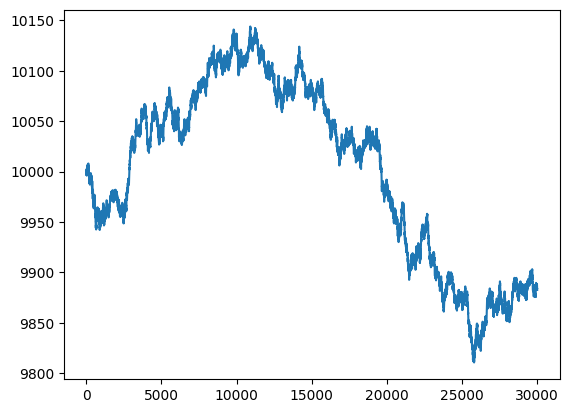

In [6]:
COCONUT.mid_price.plot()
COCONUT.mid_price.describe()

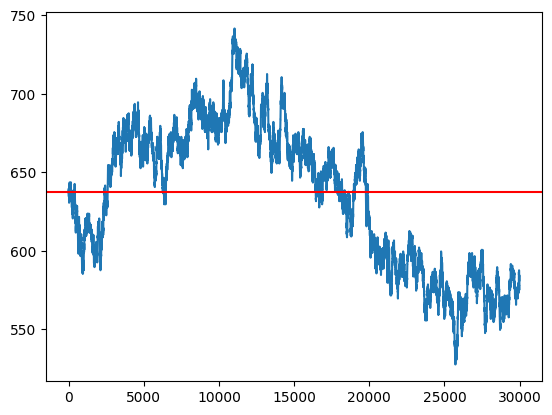

In [7]:
COCONUT_COUPON.mid_price.plot()
# 637.63 premium price line
plt.axhline(y=637.63, color='r', linestyle='-')

In [8]:
def calculate_implied_vol_sigma(S: float, K: float, r: float, T: float, t: float, price: float, call_put_flag: str = 'C') -> float:
    tau = (T - t)/365
    sigma = 0.1
    for i in range(100):
        d1 = np.log(S/K)/(sigma*np.sqrt(tau)) + (sigma*np.sqrt(tau))/2
        d2 = d1 - sigma*np.sqrt(tau)
        if call_put_flag == 'C':
            price_implied = S*norm.cdf(d1) - K*np.exp(-r*tau)*norm.cdf(d2)
        else:
            price_implied = K*np.exp(-r*tau)*norm.cdf(-d2) - S*norm.cdf(-d1)
        vega = S*np.sqrt(tau)*norm.pdf(d1)
        sigma = sigma - (price_implied - price)/vega
        
    return sigma

In [9]:
calculate_implied_vol_sigma(10000, 10000, 0., 250, 0, 637.63, 'C')

0.19332951334290502

In [10]:
def vanilla_price_BS(S: float, K: float, r: float, sigma: float, T: float, t: float = 0, 
                     call_put_flag: str = 'C') -> float:
    tau = (T - t)/365
    d1 = np.log((S*np.exp(r*tau)/K))/(sigma*np.sqrt(tau)) + (sigma*np.sqrt(tau))/2
    d2 = d1 - sigma*np.sqrt(tau)
    if call_put_flag == 'C':
        vanilla_price = S*norm.cdf(d1) - K*np.exp(-r*tau)*norm.cdf(d2)
    else:
        vanilla_price = K*np.exp(-r*tau)*norm.cdf(-d2) - S*norm.cdf(-d1)
        
    return vanilla_price

In [11]:
COCONUT_COUPON['option_price'] = COCONUT.apply(lambda x: vanilla_price_BS(x.mid_price, 10000, 0., 0.1600006436832186, 250, (x.timestamp-3_000_000)/1000000 + 1, 'C'), axis=1)

COCONUT['stock'] = COCONUT_COUPON.mid_price - COCONUT.apply(lambda x: vanilla_price_BS(x.mid_price, 10000, 0., 0.1600006436832186, 250, (x.timestamp-3_000_000)/1000000 + 1, 'P'), axis=1) + 10000

In [12]:
tea = COCONUT.apply(lambda x: vanilla_price_BS(x.mid_price, 10000, 0., 0.1600006436832186, 250, (x.timestamp-3_000_000)/1000000 + 1, 'P'), axis=1)

In [13]:
tea

0        526.828308
1        527.065069
2        527.538924
3        527.064858
4        527.538712
            ...    
29995    580.917191
29996    580.407851
29997    580.916980
29998    580.662219
29999    581.426312
Length: 30000, dtype: float64

In [14]:
COCONUT_COUPON

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,option_price
0,1,3000000,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0,526.828308
1,1,3000100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0,526.565069
2,1,3000200,COCONUT_COUPON,637.0,42.0,NaN,NaN,NaN,NaN,638,42,NaN,NaN,NaN,NaN,637.5,0.0,526.038924
3,1,3000300,COCONUT_COUPON,638.0,30.0,NaN,NaN,NaN,NaN,639,30,NaN,NaN,NaN,NaN,638.5,0.0,526.564858
4,1,3000400,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0,526.038712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3,5999500,COCONUT_COUPON,577.0,45.0,NaN,NaN,NaN,NaN,578,45,NaN,NaN,NaN,NaN,577.5,0.0,464.417191
29996,3,5999600,COCONUT_COUPON,577.0,30.0,NaN,NaN,NaN,NaN,578,30,NaN,NaN,NaN,NaN,577.5,0.0,464.907851
29997,3,5999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0,464.416980
29998,3,5999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0,464.662219


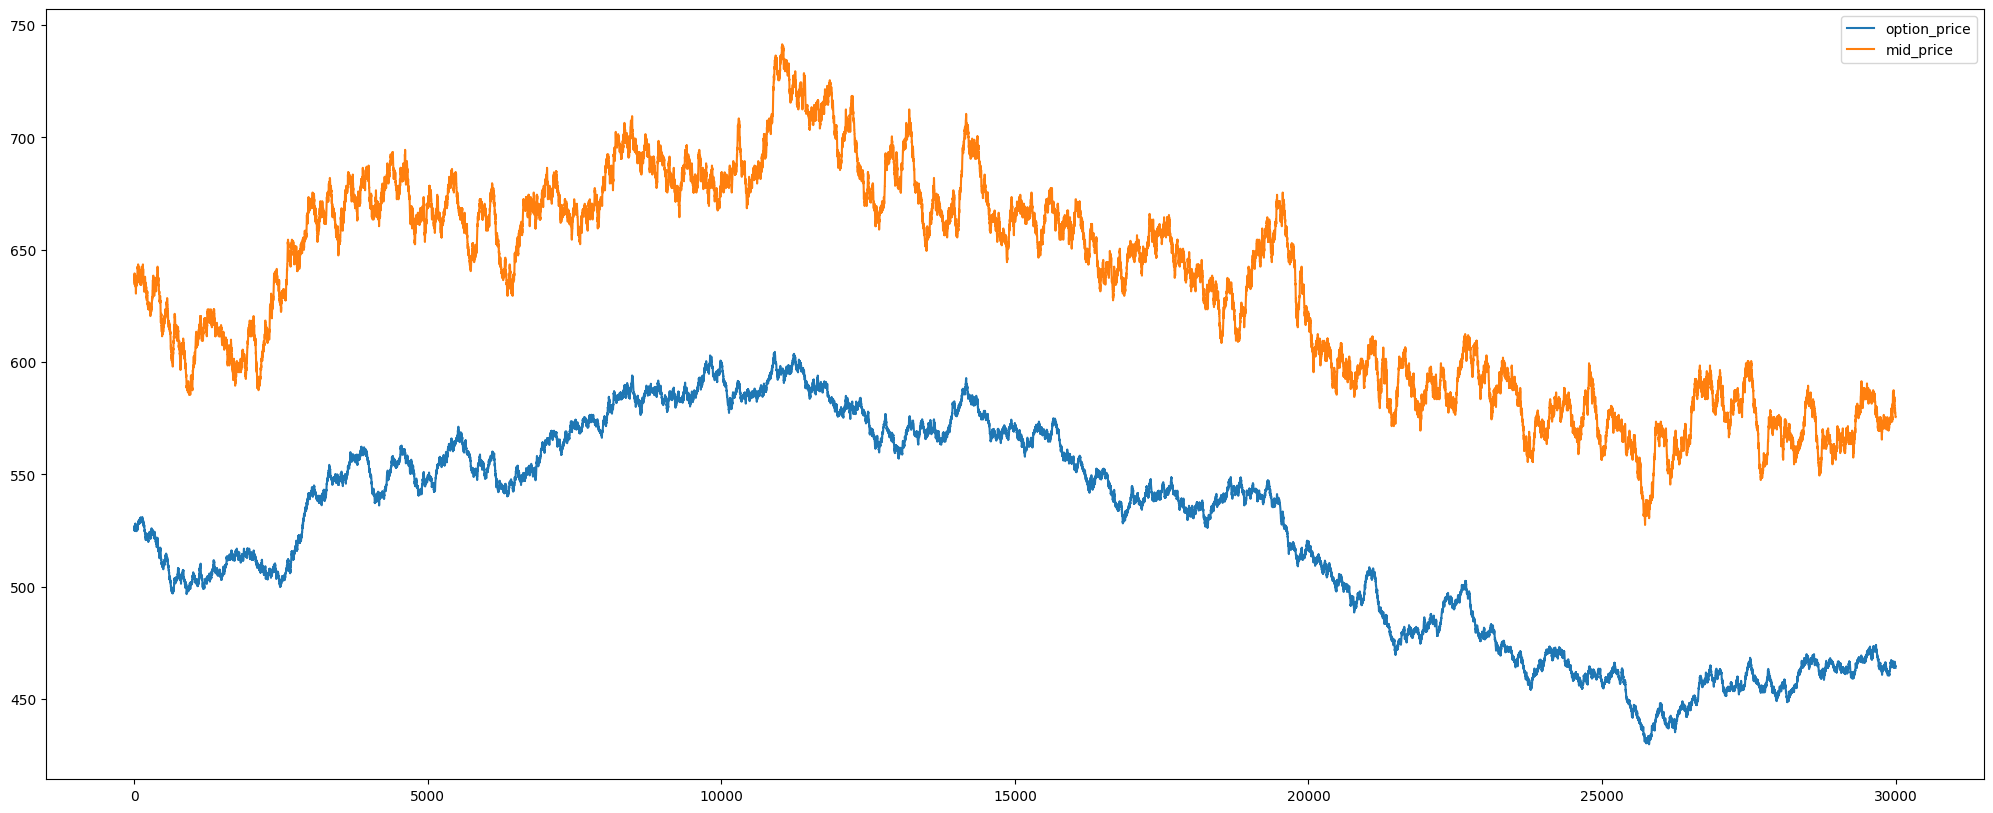

In [15]:
figs, axs = plt.subplots(1, 1, figsize=(25, 10))

COCONUT_COUPON.option_price.plot()
COCONUT_COUPON.mid_price.plot()
# COCONUT_COUPON.bid_price_1.plot()
# COCONUT_COUPON.ask_price_1.plot()
plt.legend()

count    30000.000000
mean      -108.663240
std         13.366477
min       -145.736850
25%       -118.040008
50%       -108.439551
75%        -99.646067
max        -64.448456
dtype: float64

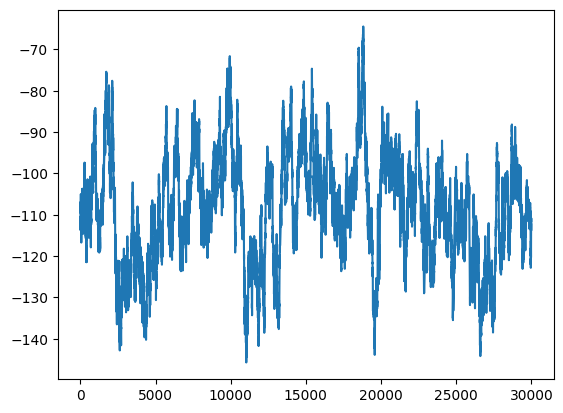

In [16]:
(COCONUT_COUPON.option_price - COCONUT_COUPON.mid_price).plot()
(COCONUT_COUPON.option_price - COCONUT_COUPON.mid_price).describe()

In [17]:
from math import erf

def norm_cdf(x):
    return (1.0 + erf(x / np.sqrt(2.0))) / 2.0

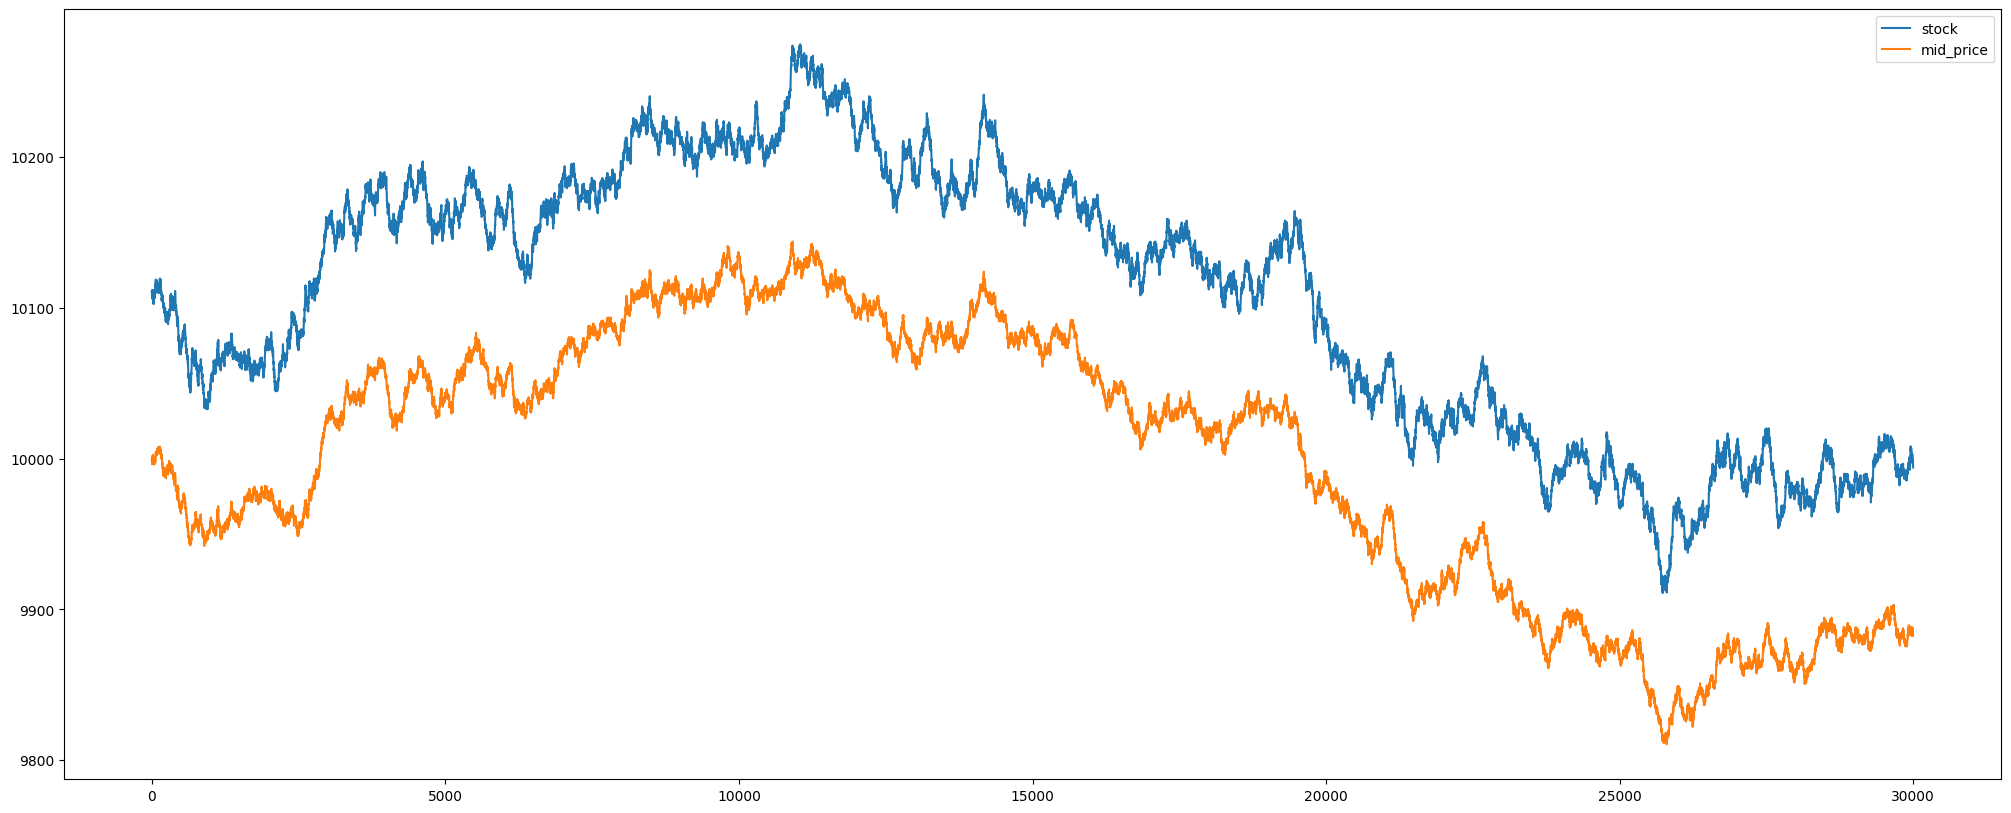

In [18]:
figs, axs = plt.subplots(1, 1, figsize=(25, 10))

COCONUT['stock'].plot()
COCONUT.mid_price.plot()
plt.legend()

count    30000.000000
mean       108.663240
std         13.366477
min         64.448456
25%         99.646067
50%        108.439551
75%        118.040008
max        145.736850
dtype: float64

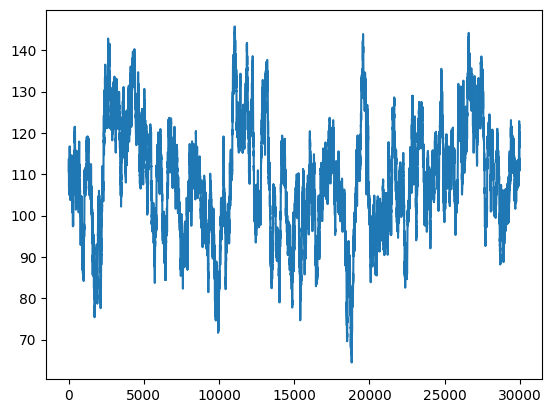

In [19]:
(COCONUT.stock - COCONUT.mid_price).plot()
(COCONUT.stock - COCONUT.mid_price).describe()

<Axes: >

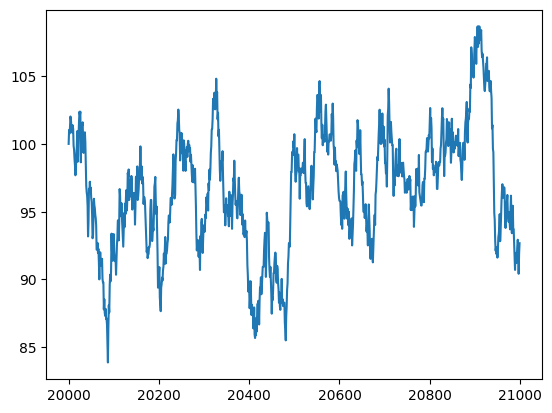

In [20]:
s = COCONUT.stock - COCONUT.mid_price
s.iloc[20000:21000].plot()

<Axes: >

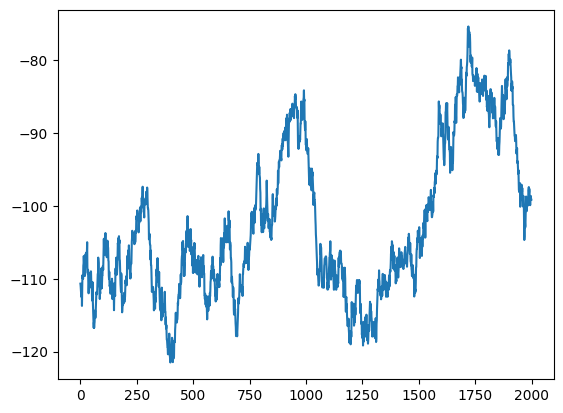

In [21]:
spread = (COCONUT_COUPON.option_price - COCONUT_COUPON.mid_price)
spread.iloc[0:2000].plot()

In [22]:
spread.iloc[20000]

-100.01253462682052

In [23]:
COCONUT_COUPON.mid_price.iloc[20000:]

20000    620.0
20001    620.5
20002    620.5
20003    621.5
20004    621.5
         ...  
29995    577.5
29996    577.5
29997    575.5
29998    575.5
29999    575.5
Name: mid_price, Length: 10000, dtype: float64

In [24]:
COCONUT.mid_price.iloc[20000:]

20000    9991.0
20001    9990.0
20002    9990.5
20003    9991.5
20004    9990.0
          ...  
29995    9883.5
29996    9884.5
29997    9883.5
29998    9884.0
29999    9882.5
Name: mid_price, Length: 10000, dtype: float64

In [25]:
COCONUT_COUPON.option_price.iloc[20000:]

20000    519.987465
20001    519.463999
20002    519.725535
20003    520.248941
20004    519.463681
            ...    
29995    464.417191
29996    464.907851
29997    464.416980
29998    464.662219
29999    463.926312
Name: option_price, Length: 10000, dtype: float64

In [26]:
vanilla_price_BS(9991, 10000, 0, 0.1600006436832186, 250, 1/10_000 + 3, 'C')

519.9873593597731